# EDA 및 시각화 


----------------------------------
# 시작합시다..

![](https://insightimi.files.wordpress.com/2020/07/on-de793_201909_g_20190830121038.gif)



In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

In [2]:
import warnings

# 경고 무시하기
warnings.filterwarnings("ignore")
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'

In [3]:
df = pd.read_csv('메인+금리.csv')
df.drop(columns = {'Unnamed: 0','금리년월일','금리년월일끝'}, inplace=True)

In [4]:
df

,시군구,전월세구분,보증금(만원),건축년도,구분,전용면적(㎡),층,도로명주소_x,계약시작,계약종료,계약년월일,구,건축나이,Latitude,Longitude,스타벅스 지점수,미쉐린 지점수,맥도날드 지점수,대규모점포 개수,금리
0,서울특별시 강남구 개포동,전세,7500,1989,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-06-01,2024-06-01,2022-06-01,강남구,34,37.473722,127.052725,0,0,0,0,1.75
1,서울특별시 강남구 개포동,전세,14333,1991,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-10-01,2024-10-01,2022-10-05,강남구,32,37.473722,127.052725,0,0,0,0,3.00
2,서울특별시 강남구 개포동,전세,17115,1991,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-07-01,2024-07-01,2022-07-07,강남구,32,37.473722,127.052725,0,0,0,0,2.25
3,서울특별시 강남구 개포동,전세,17640,1991,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-07-01,2024-07-01,2022-07-07,강남구,32,37.473722,127.052725,0,0,0,0,2.25
4,서울특별시 강남구 개포동,전세,7500,1989,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-06-01,2024-06-01,2022-06-01,강남구,34,37.473722,127.052725,0,0,0,0,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87356,서울특별시 강남구 대치동,전세,45000,2004,오피스텔,66.64,8.0,서울특별시 강남구 역삼로 432,NaN,NaN,2019-07-22,강남구,19,37.501439,127.054330,0,1,0,0,1.50
87357,서울특별시 강남구 청담동,전세,38000,2005,오피스텔,43.68,5.0,서울특별시 강남구 압구정로 461,NaN,NaN,2019-06-21,강남구,18,37.525283,127.047239,1,9,0,2,1.75
87358,서울특별시 강남구 청담동,전세,23500,2014,오피스텔,31.57,5.0,서울특별시 강남구 도산대로 406,NaN,NaN,2019-07-20,강남구,9,37.522821,127.039963,0,22,1,2,1.50
87359,서울특별시 강남구 개포동,전세,3000,2020,오피스텔,29.51,6.0,서울특별시 강남구 논현로20길 12,NaN,NaN,2020-09-08,강남구,3,37.478097,127.045854,0,0,0,0,0.50


# 통계로 요약해보기
- 연습 또 연습입니다.

In [5]:
df.describe()

,보증금(만원),건축년도,전용면적(㎡),층,건축나이,Latitude,Longitude,스타벅스 지점수,미쉐린 지점수,맥도날드 지점수,대규모점포 개수,금리
count,8.736100e+04,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000
mean,5.921226e+04,2000.491901,67.776567,6.859915,22.508099,37.498124,127.057102,21.634997,79.506198,29.297776,88.798194,1.317124
std,4.606194e+04,12.485836,37.183271,5.758265,12.485836,0.015544,0.022320,95.410359,342.298948,121.617146,292.396927,0.672580
min,4.500000e+02,1972.000000,11.390000,-1.000000,0.000000,37.460288,127.018254,0.000000,0.000000,0.000000,0.000000,0.500000
25%,2.520000e+04,1992.000000,40.560000,3.000000,10.000000,37.488198,127.040612,0.000000,0.000000,0.000000,0.000000,0.750000
50%,4.650000e+04,2002.000000,59.920000,5.000000,21.000000,37.496665,127.051556,0.000000,0.000000,0.000000,0.000000,1.250000
75%,8.000000e+04,2013.000000,84.930000,10.000000,31.000000,37.508595,127.068504,0.000000,0.000000,0.000000,17.000000,1.750000
max,1.100000e+06,2023.000000,301.470000,67.000000,51.000000,37.533026,127.112686,733.000000,3128.000000,928.000000,2389.000000,3.250000


In [6]:
df.describe(include = 'object')

,시군구,전월세구분,구분,도로명주소_x,계약시작,계약종료,계약년월일,구
count,87361,87361,87361,87361,25069,25069,87361,87361
unique,14,1,4,3729,55,80,1821,1
top,서울특별시 강남구 역삼동,전세,아파트,서울특별시 강남구 삼성로 212,2022-02-01,2024-02-01,2022-05-11,강남구
freq,14741,87361,53963,2969,1958,1923,155,87361


In [7]:
df['보증금(만원)'].mean()

59212.25829603599

In [8]:
# 중복된 값을 제거
df['보증금(만원)'].drop_duplicates().mean()

68727.807

## 분위수

In [9]:
df['보증금(만원)'].quantile(0.25)

25200.0

In [10]:
df['보증금(만원)'].quantile([0.25,0.5,0.75])

0.25    25200.0
0.50    46500.0
0.75    80000.0
Name: 보증금(만원), dtype: float64

In [11]:
# 90%는 얼마인지?
pd.Series([1,2,3,4,5]).quantile(0.9)

4.6

In [12]:
house_sold = df['보증금(만원)'] < 80000.0

In [13]:
house_sold.mean()

0.7462597726674374

## 분산


In [14]:
df['보증금(만원)'].var()

2121702395.9183118

# 표준편차 

In [15]:
df['보증금(만원)'].std()

46061.940861391326

# 최빈값 

In [16]:
df['보증금(만원)'].mode()

0    50000
Name: 보증금(만원), dtype: int64

In [17]:
df['건축년도'].mode()

0    2014
Name: 건축년도, dtype: int64

## 데이터프레임에서 기술통계 구하기

In [18]:
df.mean(numeric_only=True)

보증금(만원)      59212.258296
건축년도          2000.491901
전용면적(㎡)         67.776567
층                6.859915
건축나이            22.508099
Latitude        37.498124
Longitude      127.057102
스타벅스 지점수        21.634997
미쉐린 지점수         79.506198
맥도날드 지점수        29.297776
대규모점포 개수        88.798194
금리               1.317124
dtype: float64

# 개인적 팁 

In [50]:
# 행개수, 칼럼개수 
print(df.shape)


(87361, 21)


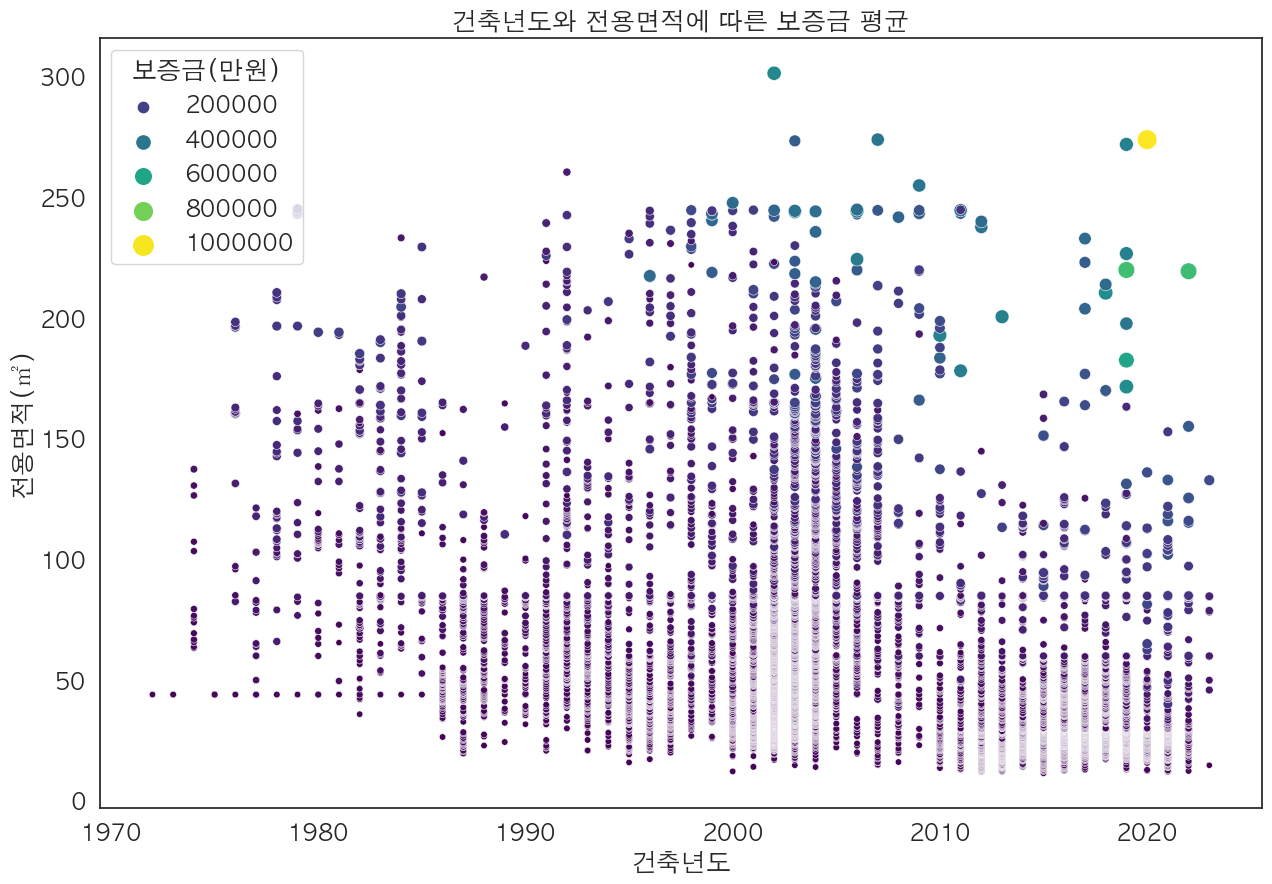

In [51]:
# groupby 적극적 사용

grouped_df = df.groupby(['건축년도', '전용면적(㎡)']).agg({
    '보증금(만원)': 'mean',
    '층': 'mean',
    '건축나이': 'mean',
    'Latitude': 'mean',
    'Longitude': 'mean',
    '스타벅스 지점수': 'sum',
    '미쉐린 지점수': 'sum',
    '맥도날드 지점수': 'sum',
    '대규모점포 개수': 'sum',
    '금리': 'mean'
}).reset_index()

plt.figure(figsize=(15, 10))

# 예시: 건축년도와 전용면적에 따른 보증금 평균 시각화
sns.scatterplot(data=grouped_df, x='건축년도', y='전용면적(㎡)', size='보증금(만원)', sizes=(20, 200), hue='보증금(만원)', palette='viridis')

plt.title('건축년도와 전용면적에 따른 보증금 평균')
plt.xlabel('건축년도')
plt.ylabel('전용면적(㎡)')
plt.legend(title='보증금(만원)')
plt.show()


# 분포 요약하기 

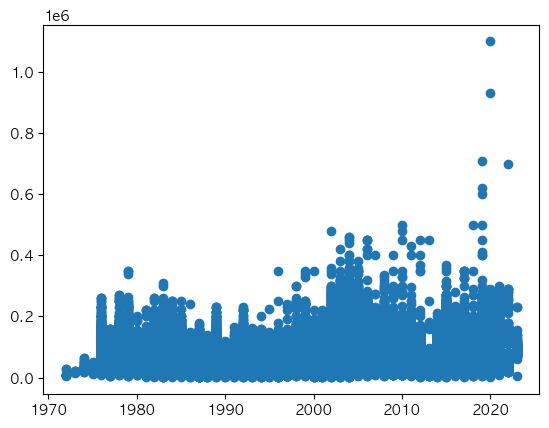

In [20]:
import matplotlib.pyplot as plt
plt.scatter(df['건축년도'], df['보증금(만원)'])
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87361 entries, 0 to 87360
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시군구        87361 non-null  object 
 1   전월세구분      87361 non-null  object 
 2   보증금(만원)    87361 non-null  int64  
 3   건축년도       87361 non-null  int64  
 4   구분         87361 non-null  object 
 5   전용면적(㎡)    87361 non-null  float64
 6   층          87361 non-null  float64
 7   도로명주소_x    87361 non-null  object 
 8   계약시작       25069 non-null  object 
 9   계약종료       25069 non-null  object 
 10  계약년월일      87361 non-null  object 
 11  구          87361 non-null  object 
 12  건축나이       87361 non-null  int64  
 13  Latitude   87361 non-null  float64
 14  Longitude  87361 non-null  float64
 15  스타벅스 지점수   87361 non-null  int64  
 16  미쉐린 지점수    87361 non-null  int64  
 17  맥도날드 지점수   87361 non-null  int64  
 18  대규모점포 개수   87361 non-null  int64  
 19  금리         87361 non-null  float64
dtypes: flo

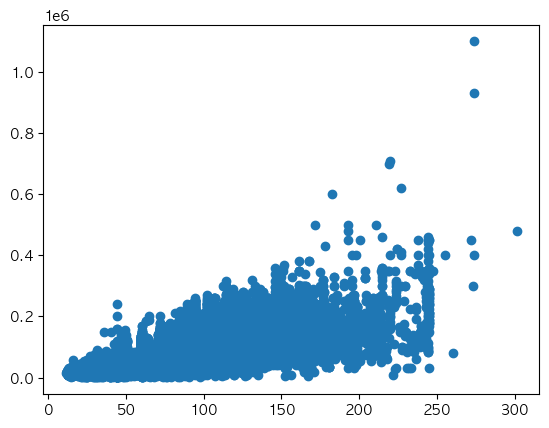

In [22]:
plt.scatter(df['전용면적(㎡)'], df['보증금(만원)'])
plt.show()

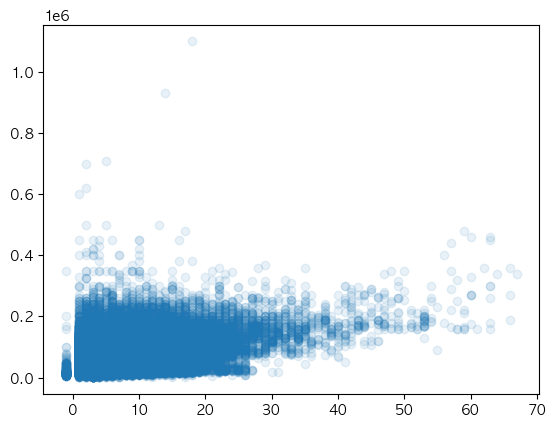

In [23]:
# 데이터 밀도 파악 더 쉬움.
plt.scatter(df['층'], df['보증금(만원)'], alpha=0.1)
plt.show()

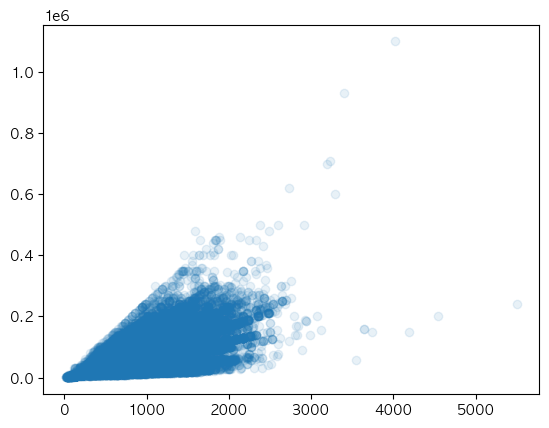

In [24]:
# 각 전용면적 당 보증금 계산
# 
average_borrows = df['보증금(만원)']/df['전용면적(㎡)']
plt.scatter(average_borrows, df['보증금(만원)'], alpha=0.1)
plt.show()

# 히스토그램 

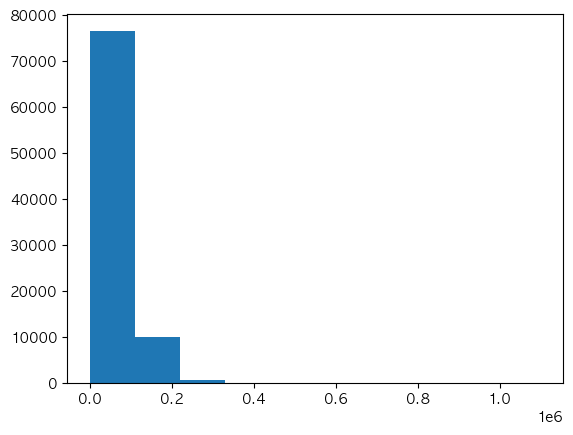

In [25]:
plt.hist(df['보증금(만원)'])
plt.show()

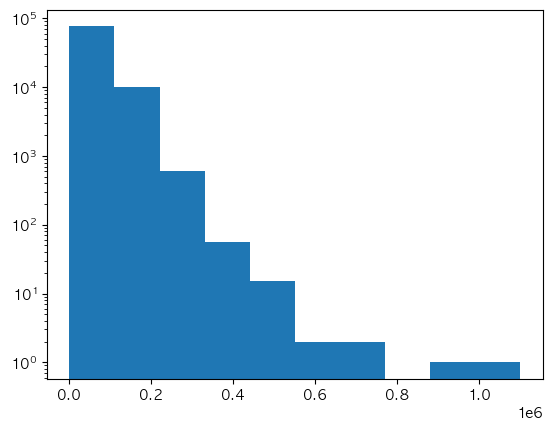

In [26]:
plt.hist(df['보증금(만원)'], log = True)
plt.show()

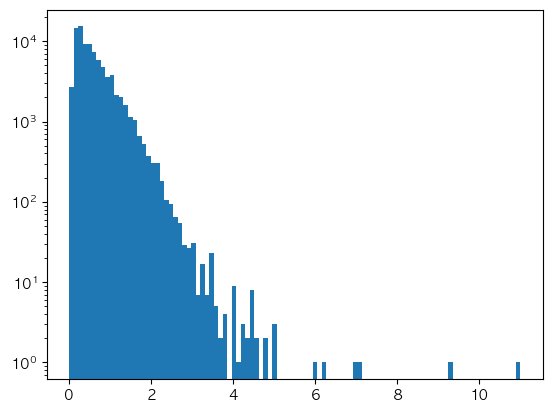

In [27]:
# 100개의 히스토그램 막대
plt.hist(df['보증금(만원)'], bins=100)
plt.yscale('log')
plt.xticks([0, 200000, 400000, 600000, 800000, 1000000], [0, 2, 4, 6, 8, 10])
plt.show()

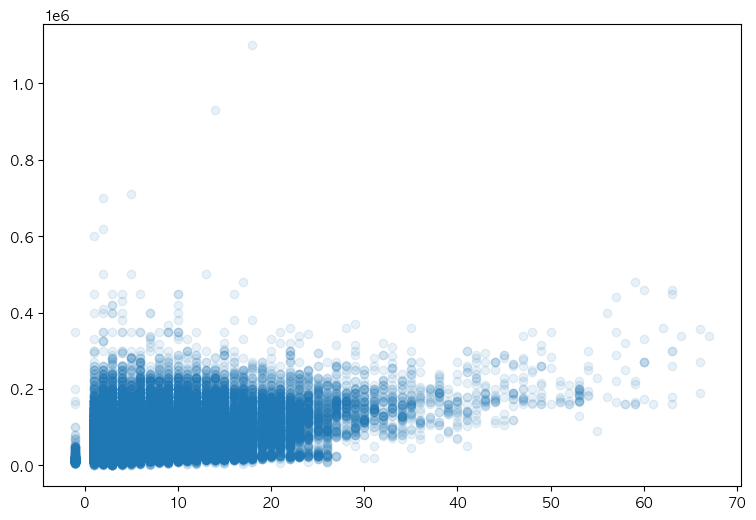

In [28]:
# figure로 그래프 다루기
# 커지죠?
plt.figure(figsize=(9, 6))
plt.scatter(df['층'], df['보증금(만원)'], alpha=0.1)
plt.show()

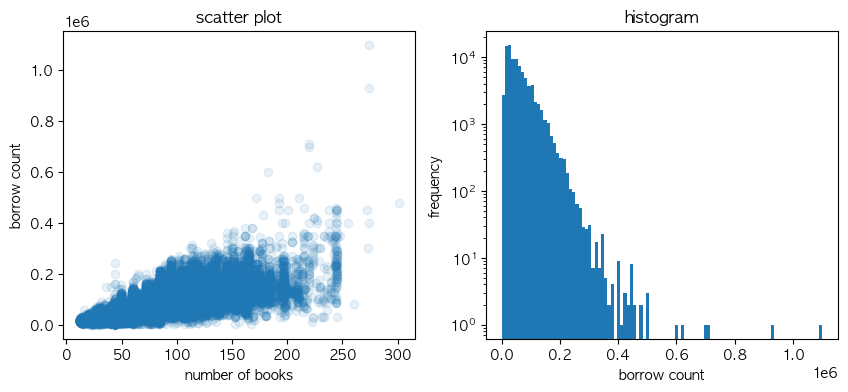

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(df['전용면적(㎡)'], df['보증금(만원)'], alpha=0.1)
axs[0].set_title('scatter plot')
axs[0].set_xlabel('number of books')
axs[0].set_ylabel('borrow count')

axs[1].hist(df['보증금(만원)'], bins=100)
axs[1].set_title('histogram')
axs[1].set_yscale('log')
axs[1].set_xlabel('borrow count')
axs[1].set_ylabel('frequency')

fig.show()

# 그냥 제가 해보는 EDA 시각화 

In [30]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import font_manager
import matplotlib.pyplot as plt
font_name = "Malgun Gothic" 

sns.set(font_scale=1.5, font=font_name)
sns.set_style("white")
sns.set_palette("Blues_r")

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

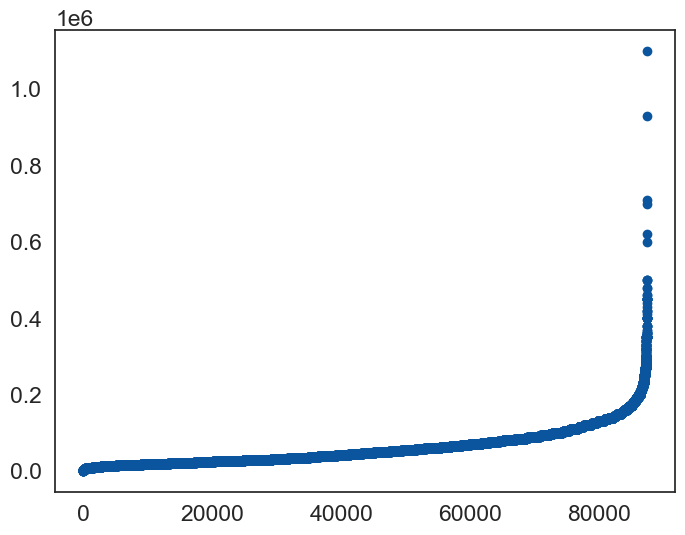

In [31]:
# 타깃값이 가장 중요하다
# 이상치 확인

plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df['보증금(만원)'].values))
plt.show()

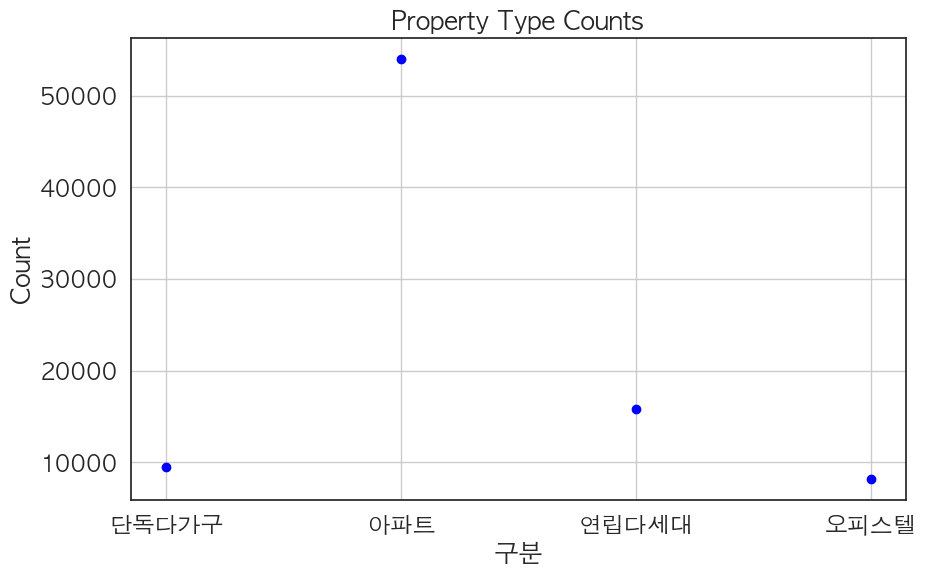

In [32]:
plt.rcParams['font.family'] = 'AppleGothic'
count_by_category = df['구분'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.scatter(count_by_category.index, count_by_category.values, color='blue', marker='o')
plt.title('Property Type Counts')
plt.xlabel('구분')
plt.ylabel('Count')
plt.grid(True)
plt.show()

<Axes: xlabel='보증금(만원)', ylabel='Density'>

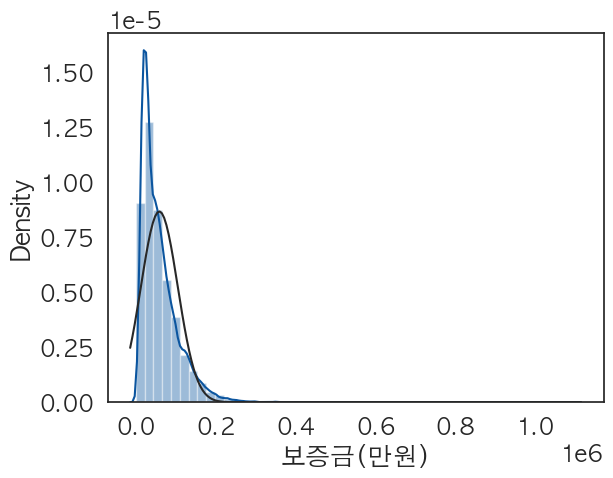

In [33]:
# 타깃변수의 정규성을 보자. 
# 로그하자..
plt.rcParams['font.family'] = 'AppleGothic'
sns.distplot(df['보증금(만원)'], fit=stats.norm)

<Axes: xlabel='보증금(만원)', ylabel='Density'>

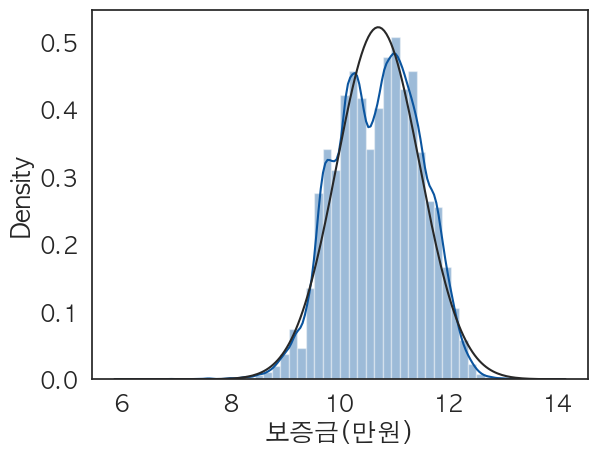

In [34]:
# 10억~ 12억 
sns.distplot(np.log1p(df['보증금(만원)']), fit=stats.norm)

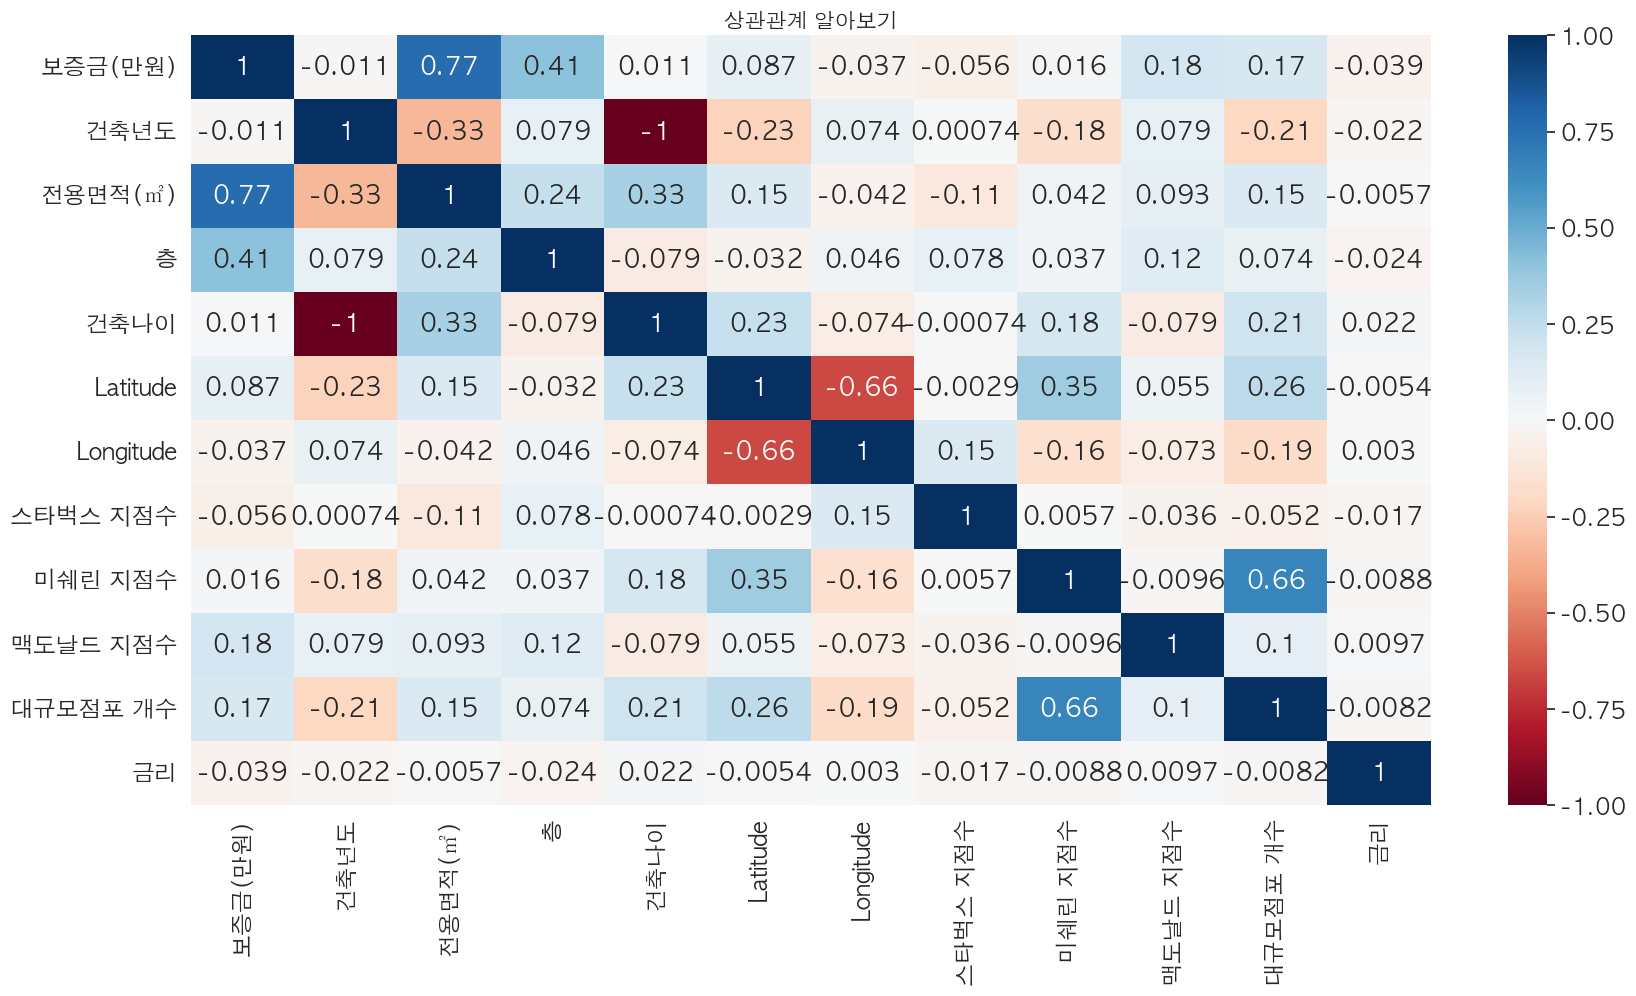

In [35]:
# 이상치 제거가 시급하다.

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="RdBu", annot=True)
plt.title("상관관계 알아보기", size=15)
plt.show()

In [36]:
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

SyntaxError: invalid decimal literal (1854386929.py, line 1)

In [ ]:
sns.distplot(df['보증금(만원)'])

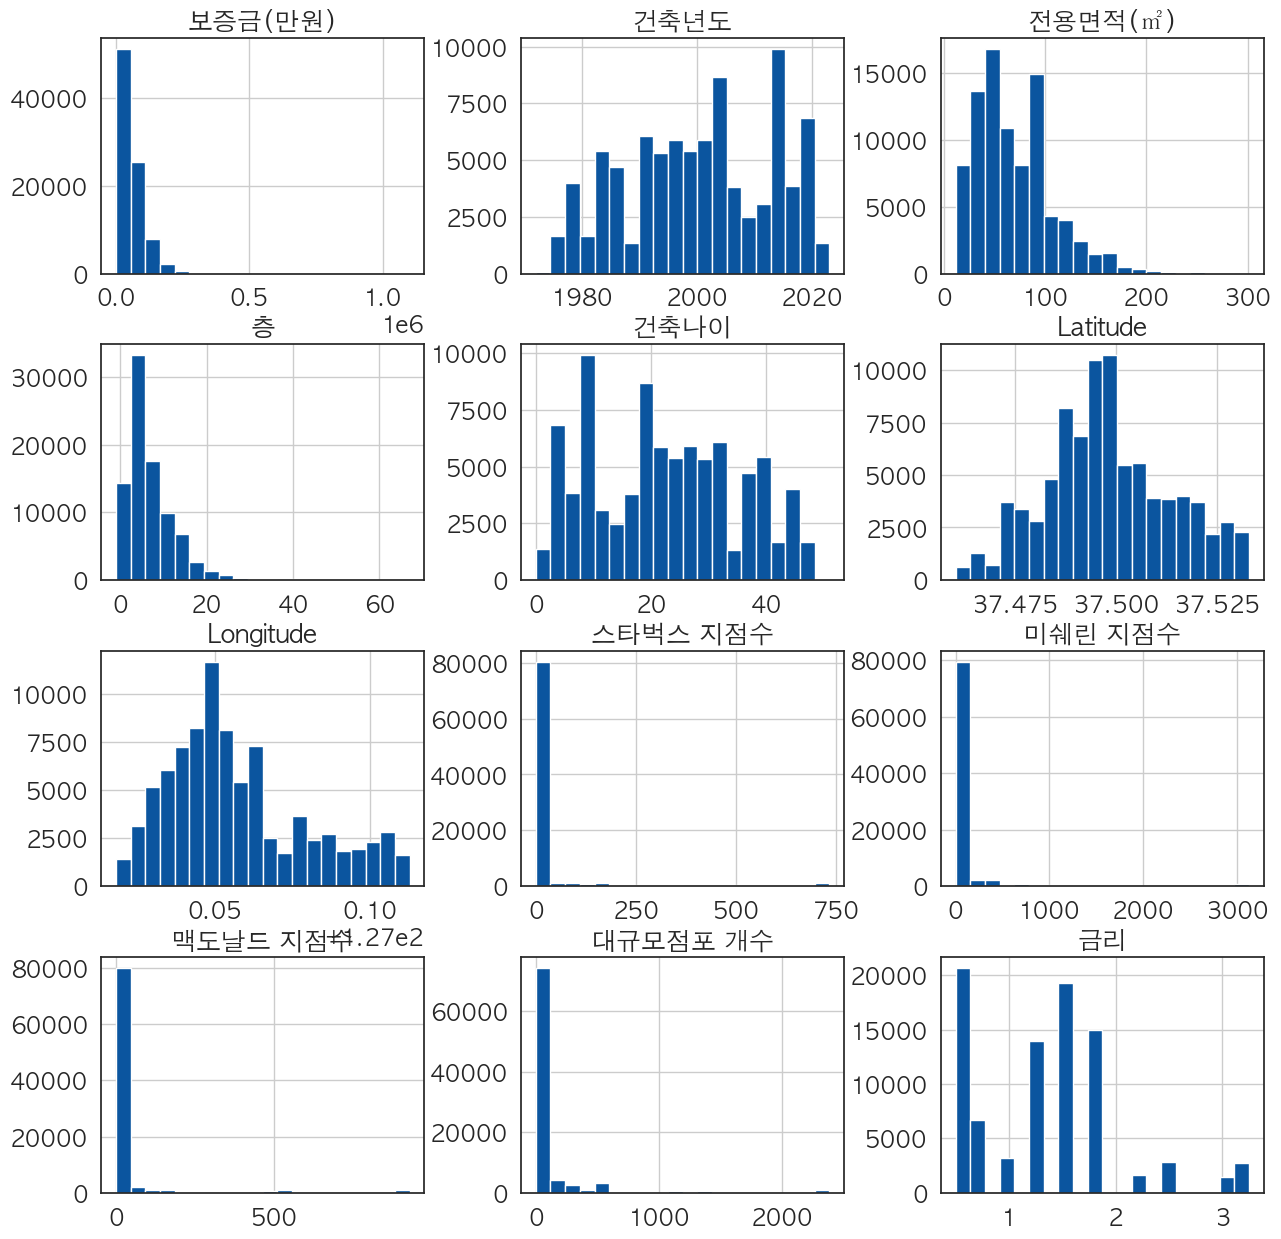

In [37]:
# 아 정규분포를 보이는 것도 있고 아닌 것도 있네

df.hist(bins=20, figsize=(15,15))
plt.show()

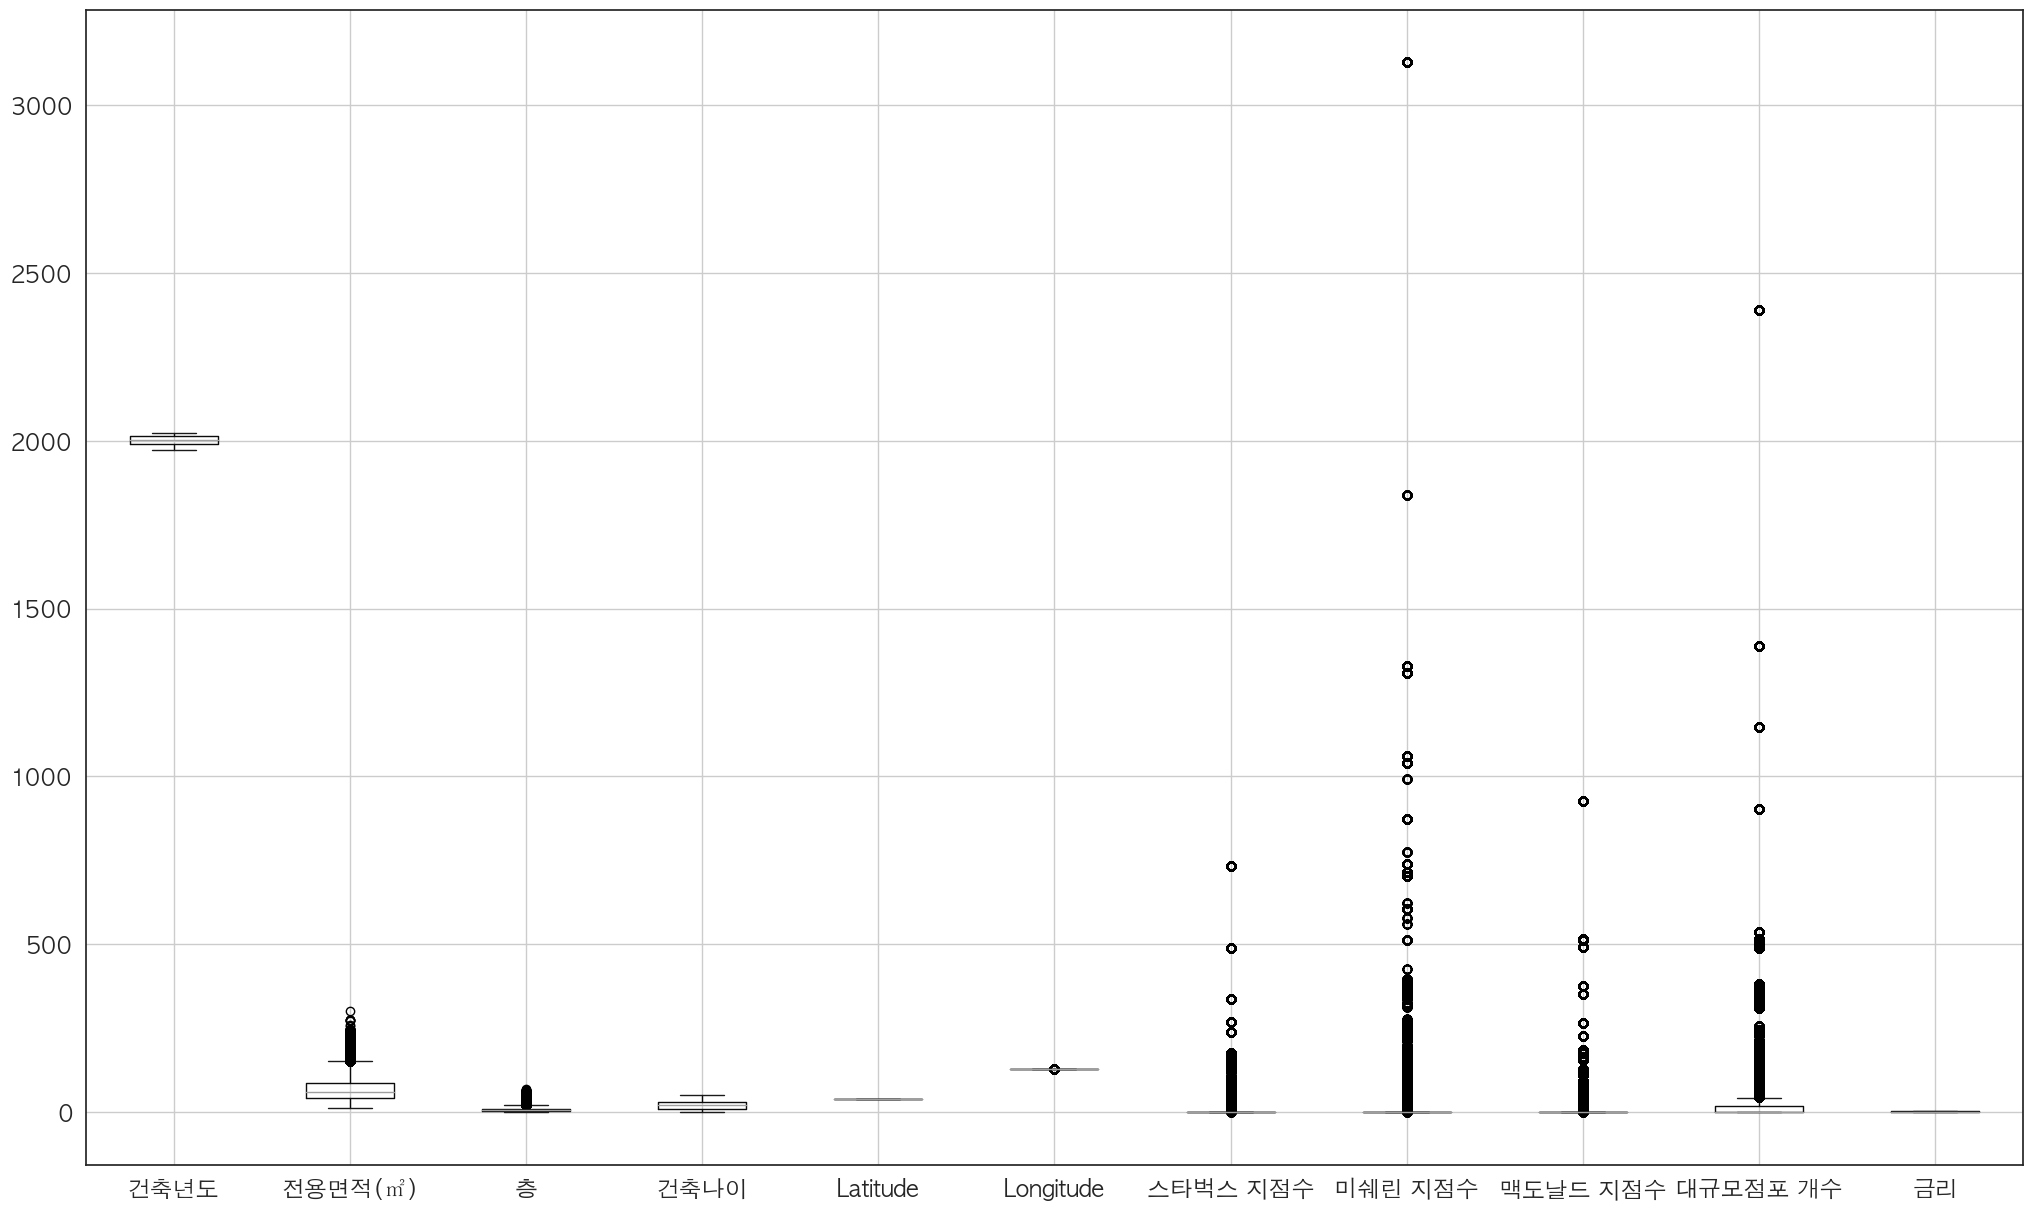

In [38]:
# 보증금이 값이 크니 없앰
df1=df.drop(['보증금(만원)'], axis=1)
df1.boxplot(figsize=(25,15))
plt.show()

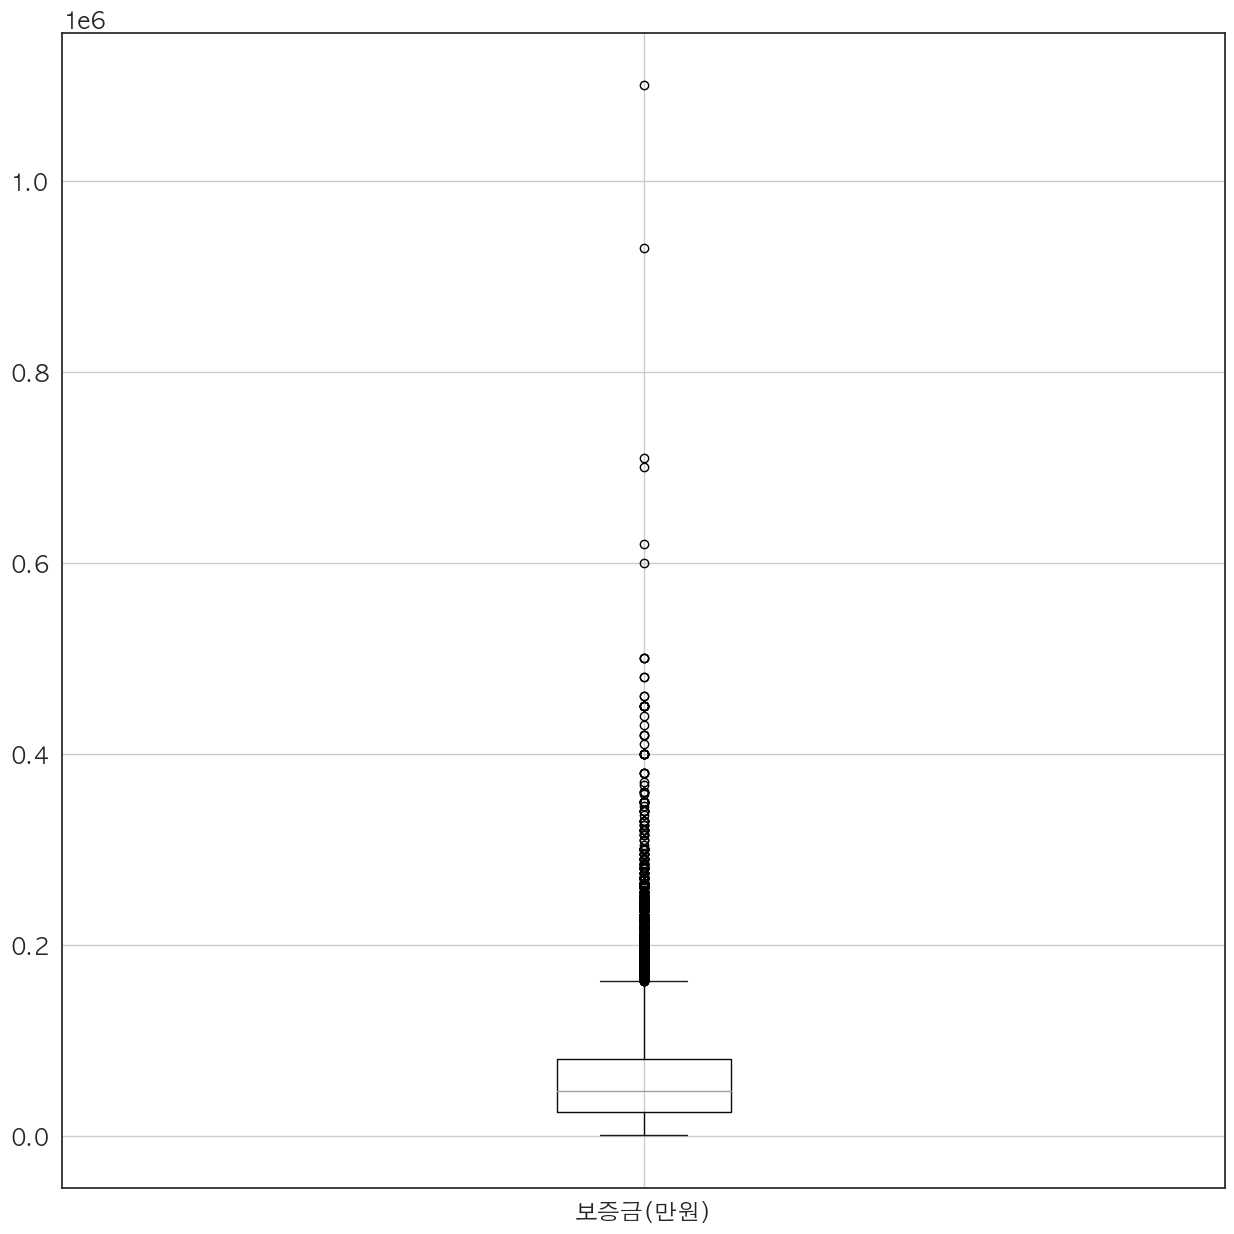

In [39]:
df.loc[:,['보증금(만원)']].boxplot(figsize=(15,15))
plt.show()

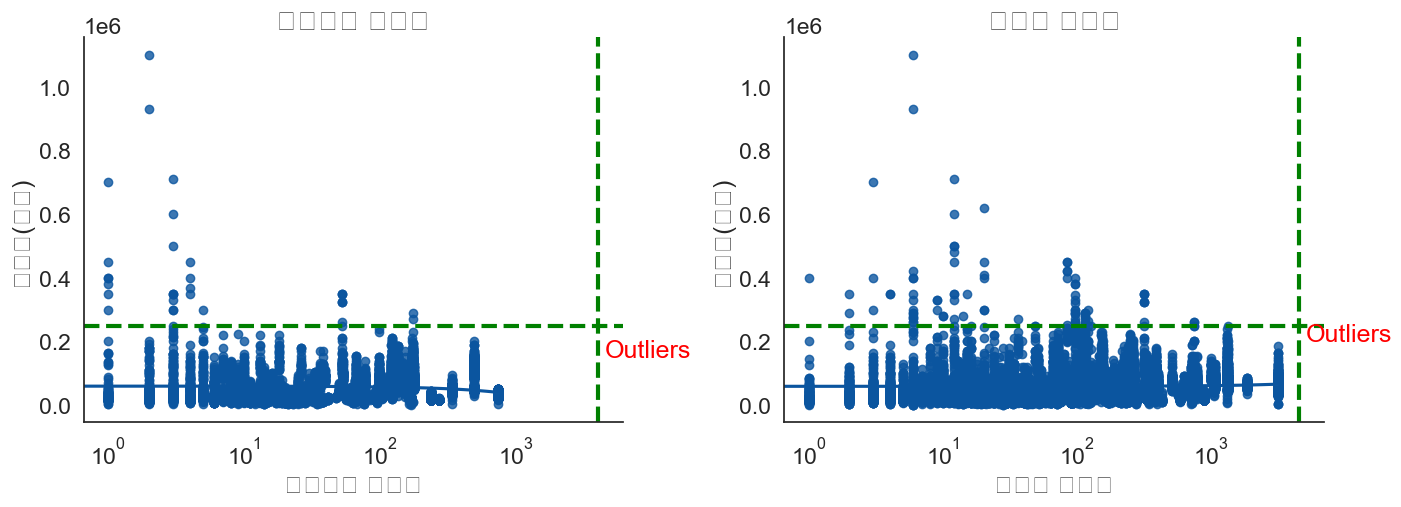

In [40]:
plt.rcParams['font.family'] = 'AppleGothic'
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("Blues_r")
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.3)
ax1 = sns.regplot(data=df, x='스타벅스 지점수',y='보증금(만원)')
ax1.set_title('스타벅스 이상치',fontsize=20)
plt.axhline(y=250000, color='Green', linestyle='--', linewidth=3)
plt.axvline(x=4000, color='Green', linestyle='--', linewidth=3)
plt.text(4500, 150000, 'Outliers',color='red')
plt.xscale('log') 
plt.subplot(1,2,2)
ax2 = sns.regplot(data=df, x='미쉐린 지점수',y='보증금(만원)')
ax2.set_title('미쉐린 이상치',fontsize=20)
plt.axhline(y=250000, color='Green', linestyle='--', linewidth=3)
plt.axvline(x=4500, color='Green', linestyle='--', linewidth=3)
plt.text(5000, 200000, 'Outliers',color='red')
plt.xscale('log') 
sns.despine()

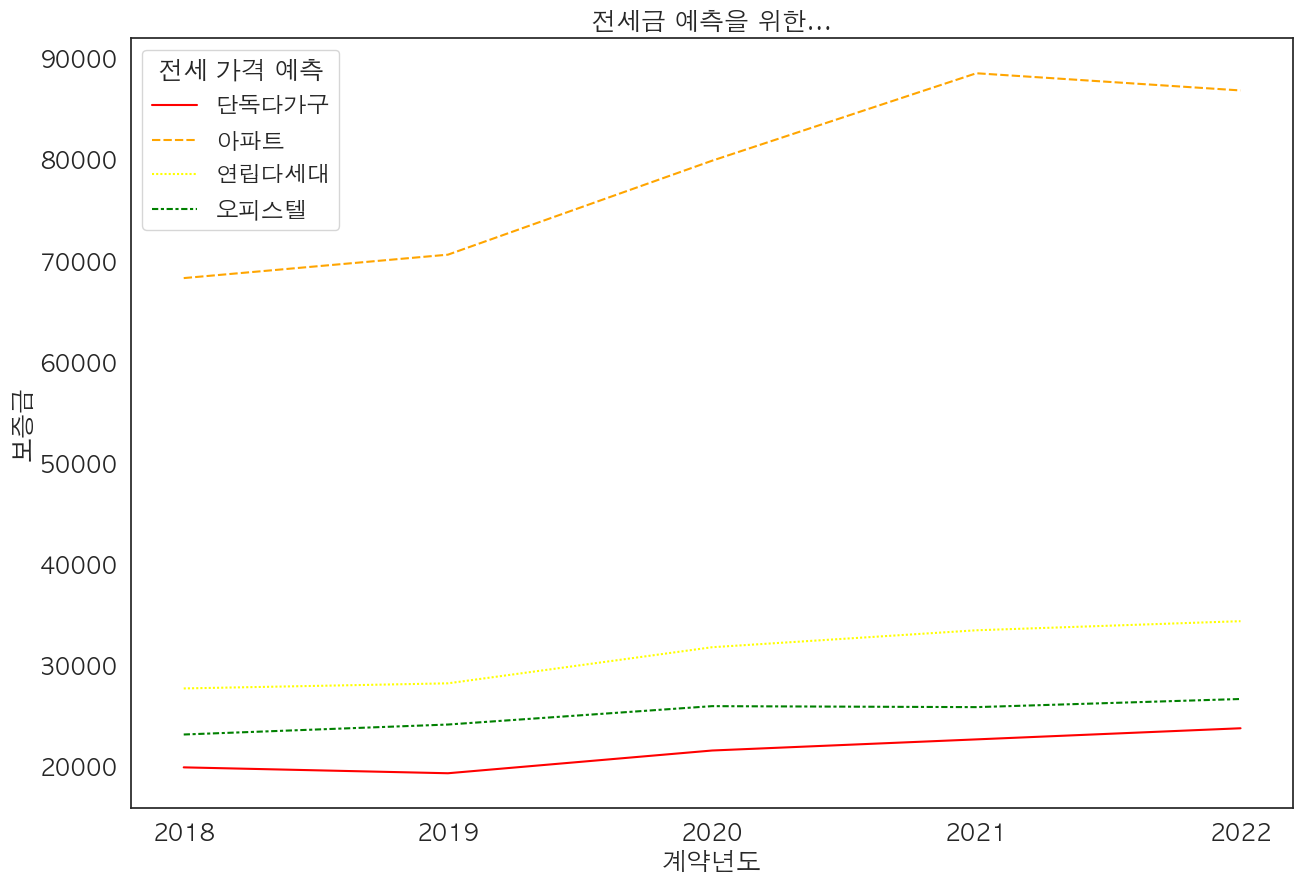

In [49]:
df['계약년월일'] = pd.to_datetime(df['계약년월일'])
df['계약년'] = df['계약년월일'].dt.year.astype(int)
df
# groupby사용

plt.rcParams['font.family'] = 'AppleGothic'
df2 = df.groupby(['계약년', '구분'])['보증금(만원)'].mean().reset_index()

pivot_df_day = df2.pivot(index='계약년', columns='구분', values='보증금(만원)')

day_names = ['2018','2019','2020','2021','2022']
pivot_df_day.index = day_names

plt.figure(figsize=(15, 10))

# 색상 설정
line_colors = ['red', 'orange', 'yellow', 'green']

sns.lineplot(data=pivot_df_day, palette=line_colors)

plt.title('전세금 예측을 위한...')
plt.xlabel('계약년도')
plt.ylabel('보증금')
plt.legend(title='전세 가격 예측')
plt.show()


In [52]:
pivot_df_day.describe()

구분,단독다가구,아파트,연립다세대,오피스텔
count,4.000000,5.000000,5.000000,5.000000
mean,21168.255440,78847.300494,31129.356263,25180.154750
std,1994.459264,9197.676491,3020.010829,1453.780808
min,19348.430322,68301.763788,27733.710547,23178.856698
25%,19785.523870,70617.764096,28237.910621,24164.869212
50%,20764.022112,79908.886447,31808.498981,25885.853821
75%,22146.753681,86854.156044,33483.211111,25982.177200
max,23796.547214,88553.932096,34383.450056,26689.016820
